<a href="https://colab.research.google.com/github/joeybaderr/Restaurant-Customer-Satisfaction-Prediction-Model/blob/main/Customer_Satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Customer Satisfaction ML Analysis**

---



## Dataset Description

**Demographic Information**

*   CustomerID: Unique identifier for each customer.
*   Age: Age of the customer.
*   Gender: Gender of the customer (Male/Female).
*   Income: Annual income of the customer in USD.

**Visit-specific Variables**
*   VisitFrequency: How often the customer visits the restaurant (Daily, Weekly, Monthly, Rarely).
*   AverageSpend: Average amount spent by the customer per visit in USD.
*   PreferredCuisine: The type of cuisine preferred by the customer (Italian, Chinese, Indian, Mexican, American).
*   TimeOfVisit: The time of day the customer usually visits (Breakfast, Lunch, Dinner).
*   GroupSize: Number of people in the customer's group during the visit.
*   DiningOccasion: The occasion for dining (Casual, Business, Celebration).
*   MealType: Type of meal (Dine-in, Takeaway).
*   OnlineReservation: Whether the customer made an online reservation (0: No, 1: Yes).
*   DeliveryOrder: Whether the customer ordered delivery (0: No, 1: Yes).
*   LoyaltyProgramMember: Whether the customer is a member of the restaurant's loyalty program (0: No, 1: Yes).
*   WaitTime: Average wait time for the customer in minutes.

**Satisfaction Ratings**
*   ServiceRating: Customer's rating of the service (1 to 5).
*   FoodRating: Customer's rating of the food (1 to 5).
*   AmbianceRating: Customer's rating of the restaurant ambiance (1 to 5).

**Target Variable**
*   HighSatisfaction: Binary variable indicating whether the customer is highly satisfied (1) or not (0).

## Data Loading & Reading

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Path_to_data = '/content/drive/MyDrive/Colab Notebooks/ZAKA_Project/restaurant_customer_satisfaction.csv'

In [ ]:
# read CSV file in Pandas
data = pd.read_csv(Path_to_data)

# display first 10 rows
data.head(10)

,CustomerID,Age,Gender,Income,VisitFrequency,AverageSpend,PreferredCuisine,TimeOfVisit,GroupSize,DiningOccasion,MealType,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,AmbianceRating,HighSatisfaction
0,654,35,Male,83380,Weekly,27.829142,Chinese,Breakfast,3,Business,Takeaway,0,1,1,43.523929,2,5,4,0
1,655,19,Male,43623,Rarely,115.408622,American,Dinner,1,Casual,Dine-in,0,0,0,57.524294,5,5,3,0
2,656,41,Female,83737,Weekly,106.693771,American,Dinner,6,Celebration,Dine-in,0,1,0,48.682623,3,4,5,0
3,657,43,Male,96768,Rarely,43.508508,Indian,Lunch,1,Celebration,Dine-in,0,0,0,7.552993,4,5,1,0
4,658,55,Female,67937,Monthly,148.084627,Chinese,Breakfast,1,Business,Takeaway,0,0,1,37.789041,2,3,5,0
5,659,42,Female,28860,Monthly,111.064696,Chinese,Dinner,8,Celebration,Takeaway,0,1,1,26.853298,4,5,3,0
6,660,20,Female,131104,Weekly,120.236707,Indian,Lunch,6,Business,Dine-in,0,0,0,7.927917,5,4,1,0
7,661,51,Female,137882,Weekly,160.979098,Mexican,Dinner,6,Business,Dine-in,1,1,0,56.447210,4,3,3,0
8,662,27,Male,149638,Weekly,56.558632,Indian,Breakfast,5,Celebration,Takeaway,0,1,0,39.568188,2,4,5,0
9,663,32,Female,136145,Weekly,65.753455,Italian,Lunch,9,Casual,Takeaway,0,0,0,20.782469,4,3,1,0


## **Exploratory Data Analysis**


In [ ]:
# get the number of rows and columns
rows = data.shape[0]
columns = data.shape[1]

print('There are {} rows and {} columns.'.format(rows,columns))

There are 1500 rows and 19 columns.


Using the function **info()**, we can check:
 - data types (int, float, or object (e.g., string))
 - missing values
 - memory usage
 - number of rows and columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            1500 non-null   int64  
 1   Age                   1500 non-null   int64  
 2   Gender                1500 non-null   object 
 3   Income                1500 non-null   int64  
 4   VisitFrequency        1500 non-null   object 
 5   AverageSpend          1500 non-null   float64
 6   PreferredCuisine      1500 non-null   object 
 7   TimeOfVisit           1500 non-null   object 
 8   GroupSize             1500 non-null   int64  
 9   DiningOccasion        1500 non-null   object 
 10  MealType              1500 non-null   object 
 11  OnlineReservation     1500 non-null   int64  
 12  DeliveryOrder         1500 non-null   int64  
 13  LoyaltyProgramMember  1500 non-null   int64  
 14  WaitTime              1500 non-null   float64
 15  ServiceRating        

Using the function **describe()**, we can check the mean, standard deviation, maximum, and minimum of each numerical feature (column)

In [ ]:
data.describe()

,CustomerID,Age,Income,AverageSpend,GroupSize,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,AmbianceRating,HighSatisfaction
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,1403.500000,43.832000,85921.890000,105.659004,5.035333,0.296667,0.405333,0.480000,30.163550,3.044000,2.997333,2.987333,0.134000
std,433.157015,14.967157,38183.051749,52.381849,2.558864,0.456941,0.491120,0.499766,17.214184,1.423405,1.418920,1.450716,0.340766
min,654.000000,18.000000,20012.000000,10.306127,1.000000,0.000000,0.000000,0.000000,0.001380,1.000000,1.000000,1.000000,0.000000
25%,1028.750000,31.750000,52444.000000,62.287907,3.000000,0.000000,0.000000,0.000000,15.235423,2.000000,2.000000,2.000000,0.000000
50%,1403.500000,44.000000,85811.000000,104.626408,5.000000,0.000000,0.000000,0.000000,30.044055,3.000000,3.000000,3.000000,0.000000
75%,1778.250000,57.000000,119159.250000,148.649330,7.000000,1.000000,1.000000,1.000000,45.285649,4.000000,4.000000,4.000000,0.000000
max,2153.000000,69.000000,149875.000000,199.973527,9.000000,1.000000,1.000000,1.000000,59.970762,5.000000,5.000000,5.000000,1.000000


### Distribution of High Satisfaction

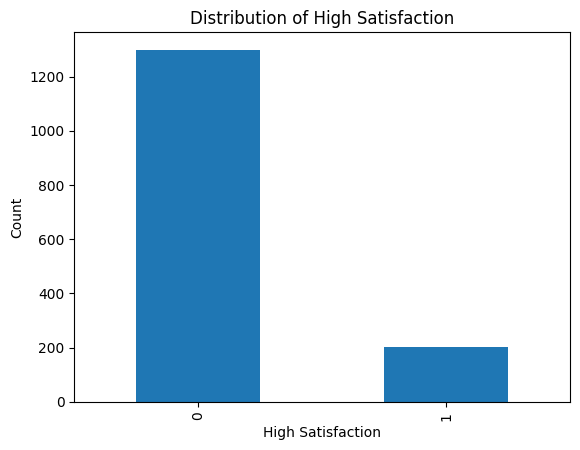

In [ ]:
data['HighSatisfaction'].value_counts().plot(kind='bar')
plt.xlabel('High Satisfaction')
plt.ylabel('Count')
plt.title('Distribution of High Satisfaction')
plt.show()

In [ ]:
# prompt: test for multicollinarity

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'data' is your DataFrame and you want to check for multicollinearity
# among numerical features used in your model.  Replace these with your actual features.
numerical_features = ['Age', 'Income', 'AverageSpend', 'GroupSize', 'WaitTime', 'ServiceRating', 'FoodRating', 'AmbianceRating']
X = data[numerical_features]

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data

# Interpret VIF values
# A VIF value of 1 indicates no multicollinearity.
# A VIF value between 1 and 5 indicates moderate multicollinearity.
# A VIF value greater than 5 indicates high multicollinearity.

,feature,VIF
0,Age,7.363271
1,Income,5.208491
2,AverageSpend,4.677109
3,GroupSize,4.577811
4,WaitTime,3.752410
5,ServiceRating,5.000557
6,FoodRating,5.012292
7,AmbianceRating,4.642946


In [ ]:
# prompt: count the number of different values of each feature

for col in data.columns:
    print(f"Feature: {col}")
    print(data[col].value_counts())
    print("-" * 20)

### Plots

### 1 - Preferred Cuisine



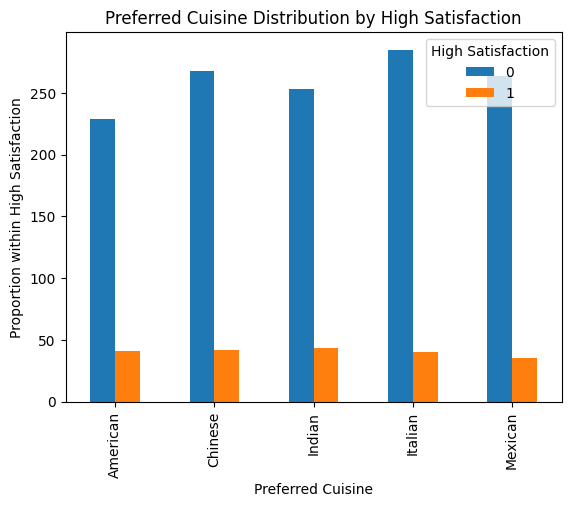

In [ ]:
pd.crosstab(data['PreferredCuisine'], data['HighSatisfaction']).plot(kind='bar')
plt.xlabel('Preferred Cuisine')
plt.ylabel('Proportion within High Satisfaction')
plt.title('Preferred Cuisine Distribution by High Satisfaction')
plt.legend(title='High Satisfaction')
plt.show()

 ### 2 - Income


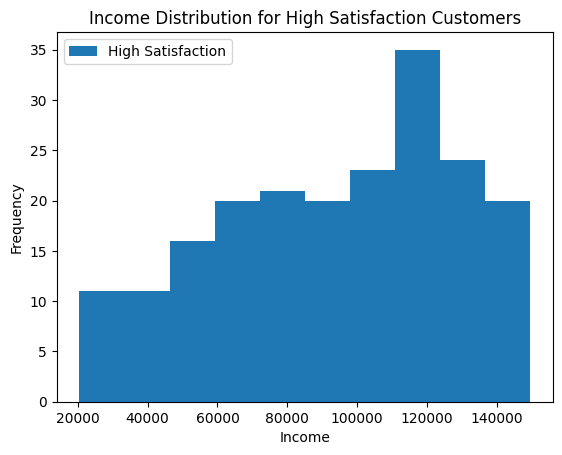

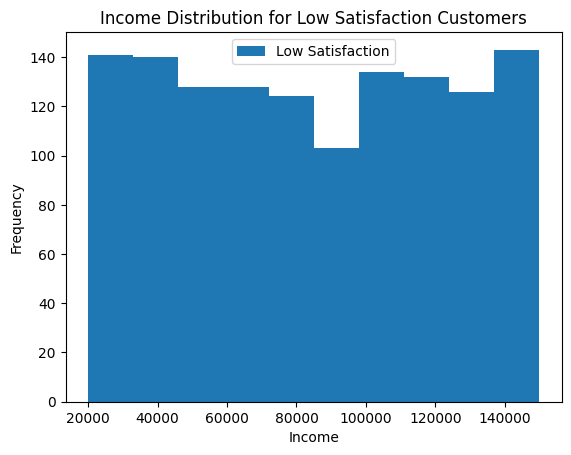

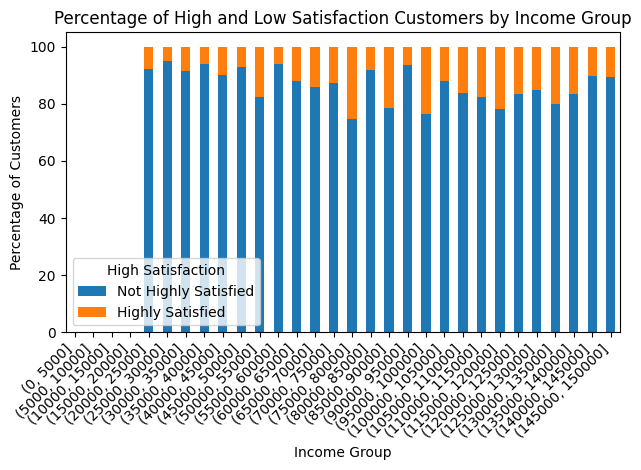

In [ ]:
plt.hist(data[data['HighSatisfaction'] == 1]['Income'], label='High Satisfaction')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Income Distribution for High Satisfaction Customers')
plt.legend()
plt.show()

plt.hist(data[data['HighSatisfaction'] == 0]['Income'], label='Low Satisfaction')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Income Distribution for Low Satisfaction Customers')
plt.legend()
plt.show()

import matplotlib.pyplot as plt

# Group the data by income and high satisfaction, then count occurrences
income_groups = pd.cut(data['Income'], bins=range(0, int(data['Income'].max()) + 5001, 5000))
grouped_data = data.groupby([income_groups, 'HighSatisfaction'])['CustomerID'].count().unstack(fill_value=0)

# Calculate percentages
grouped_data_percentage = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Plot the percentages
grouped_data_percentage.plot(kind='bar', stacked=True)
plt.xlabel('Income Group')
plt.ylabel('Percentage of Customers')
plt.title('Percentage of High and Low Satisfaction Customers by Income Group')
plt.legend(title='High Satisfaction', labels=['Not Highly Satisfied', 'Highly Satisfied'])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

### 3 - Average Spending


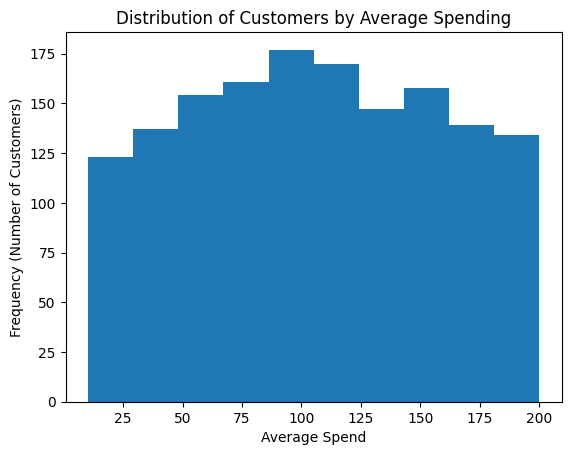

In [ ]:
plt.hist(data['AverageSpend'], bins=10)  # Adjust the number of bins as needed
plt.xlabel('Average Spend')
plt.ylabel('Frequency (Number of Customers)')
plt.title('Distribution of Customers by Average Spending')
plt.show()

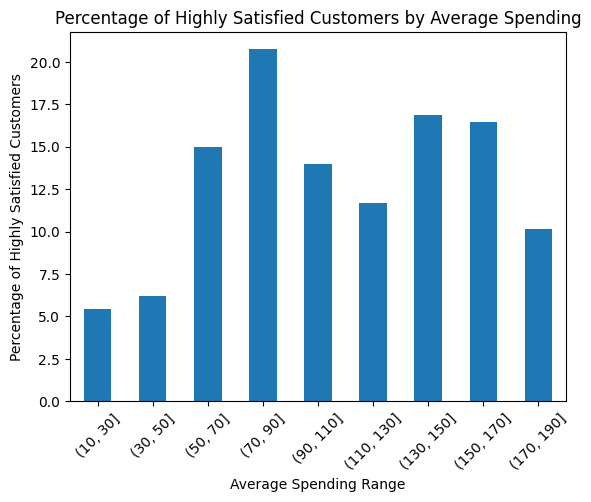

In [ ]:
# Calculate the range of average spending and round up the maximum to the nearest whole number
min_spend = int(data['AverageSpend'].min())
max_spend = int(np.ceil(data['AverageSpend'].max()))

# Create bins with whole values using np.arange()
bins = np.arange(min_spend, max_spend + 1, 20)  # Adjust the step size (50 here) as needed

# Group data by average spending bins and count total customers in each bin
total_customers_per_bin = data.groupby(pd.cut(data['AverageSpend'], bins=bins))['CustomerID'].count()

# Group data by average spending bins and count highly satisfied customers in each bin
high_satisfaction_per_bin = data[data['HighSatisfaction'] == 1].groupby(pd.cut(data['AverageSpend'], bins=bins))['CustomerID'].count()

# Calculate percentage of highly satisfied customers in each bin
percentage_high_satisfaction = (high_satisfaction_per_bin / total_customers_per_bin) * 100

# Plot the percentages as a bar chart
percentage_high_satisfaction.plot(kind='bar')
plt.xlabel('Average Spending Range')
plt.ylabel('Percentage of Highly Satisfied Customers')
plt.title('Percentage of Highly Satisfied Customers by Average Spending')
plt.xticks(rotation=45)
plt.show()

### 4 - Gender

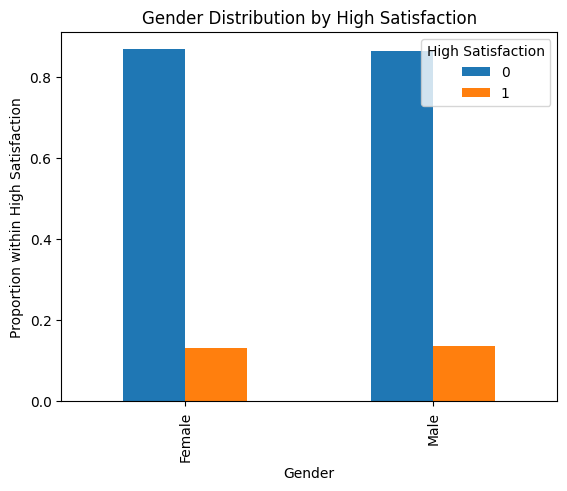

In [ ]:
pd.crosstab(data['Gender'], data['HighSatisfaction']).apply(lambda r: r/r.sum(), axis=1).plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Proportion within High Satisfaction')
plt.title('Gender Distribution by High Satisfaction')
plt.legend(title='High Satisfaction')
plt.show()

### 5 - Time of Visit

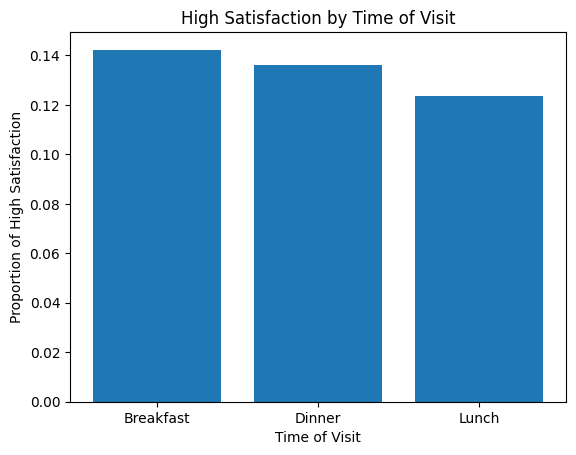

In [ ]:
# Calculate proportion of high satisfaction for each time of visit
prop_high_satisfaction = data.groupby('TimeOfVisit')['HighSatisfaction'].mean()

# Create bar plot
plt.bar(prop_high_satisfaction.index, prop_high_satisfaction.values)
plt.xlabel('Time of Visit')
plt.ylabel('Proportion of High Satisfaction')
plt.title('High Satisfaction by Time of Visit')
plt.show()

### 6 - Food Rating

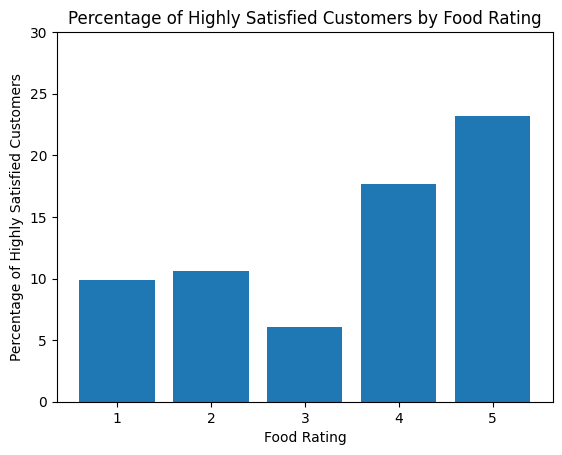

In [ ]:
# Group the data by 'FoodRating' and calculate the mean of 'HighSatisfaction' for each group
satisfaction_by_rating = data.groupby('FoodRating')['HighSatisfaction'].mean() * 100

# Create a bar plot
plt.bar(satisfaction_by_rating.index, satisfaction_by_rating.values)
plt.xlabel('Food Rating')
plt.ylabel('Percentage of Highly Satisfied Customers')
plt.title('Percentage of Highly Satisfied Customers by Food Rating')
plt.ylim(0, 30)  # Set y-axis limits to 0-100% for better visualization
plt.show()

### 7 - Ambience Rating

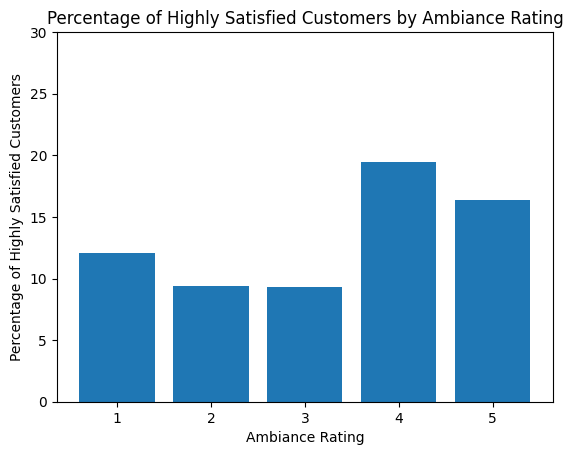

In [ ]:
satisfaction_by_ambience = data.groupby('AmbianceRating')['HighSatisfaction'].mean() * 100

plt.figure()  # Create a new figure for Ambience Rating plot
plt.bar(satisfaction_by_ambience.index, satisfaction_by_ambience.values)
plt.xlabel('Ambiance Rating')
plt.ylabel('Percentage of Highly Satisfied Customers')
plt.title('Percentage of Highly Satisfied Customers by Ambiance Rating')
plt.ylim(0, 30)
plt.show()

### 8 - Service Rating

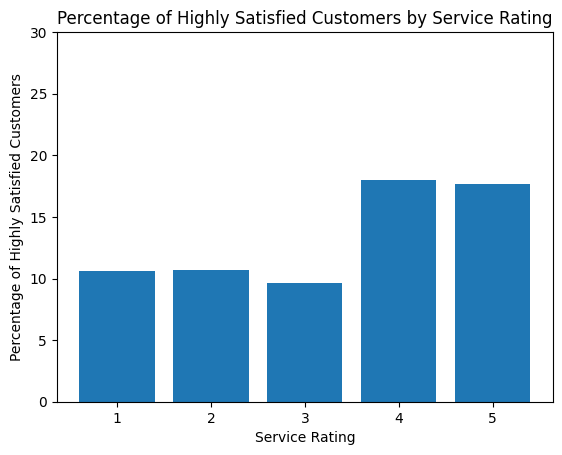

In [ ]:
satisfaction_by_service = data.groupby('ServiceRating')['HighSatisfaction'].mean() * 100

plt.figure()  # Create a new figure for Service Rating plot
plt.bar(satisfaction_by_service.index, satisfaction_by_service.values)
plt.xlabel('Service Rating')
plt.ylabel('Percentage of Highly Satisfied Customers')
plt.title('Percentage of Highly Satisfied Customers by Service Rating')
plt.ylim(0, 30)
plt.show()

### 9 - Age


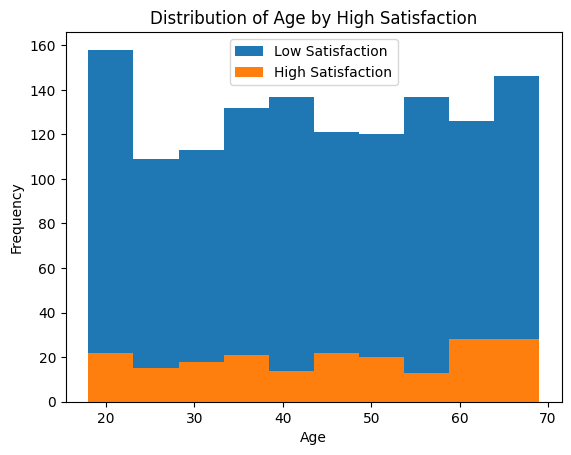

In [ ]:
plt.hist(data[data['HighSatisfaction'] == 0]['Age'], label='Low Satisfaction', alpha=1)
plt.hist(data[data['HighSatisfaction'] == 1]['Age'], label='High Satisfaction')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age by High Satisfaction')
plt.legend()
plt.show()

### 10 - Group Size

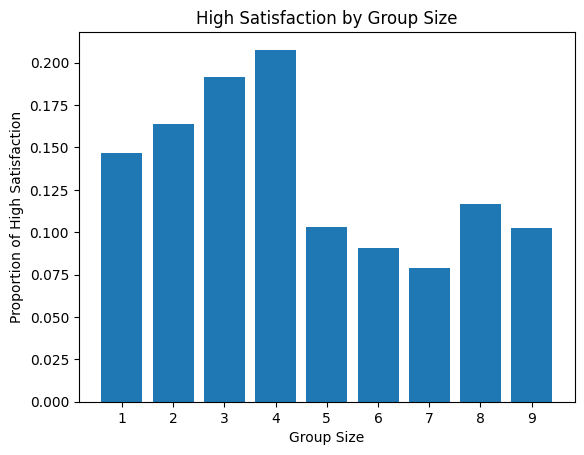

In [ ]:
import matplotlib.pyplot as plt

# Calculate proportion of high satisfaction for each group size
prop_high_satisfaction = data.groupby('GroupSize')['HighSatisfaction'].mean()

# Create bar plot
plt.bar(prop_high_satisfaction.index, prop_high_satisfaction.values)
plt.xlabel('Group Size')
plt.xticks(range(data['GroupSize'].min(), data['GroupSize'].max() + 1))
plt.ylabel('Proportion of High Satisfaction')
plt.title('High Satisfaction by Group Size')
plt.show()

### 11 - Visit Frequency

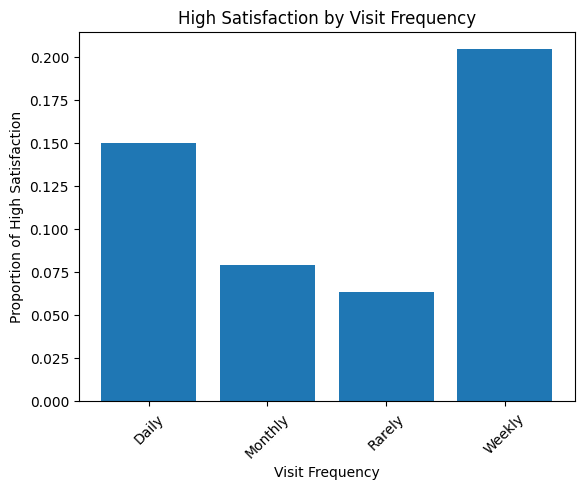

In [ ]:
import matplotlib.pyplot as plt

# Calculate proportion of high satisfaction for each visit frequency
prop_high_satisfaction = data.groupby('VisitFrequency')['HighSatisfaction'].mean()

# Create bar plot
plt.bar(prop_high_satisfaction.index, prop_high_satisfaction.values)
plt.xlabel('Visit Frequency')
plt.ylabel('Proportion of High Satisfaction')
plt.title('High Satisfaction by Visit Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability if needed
plt.show()

### 12 - Dining Occasion

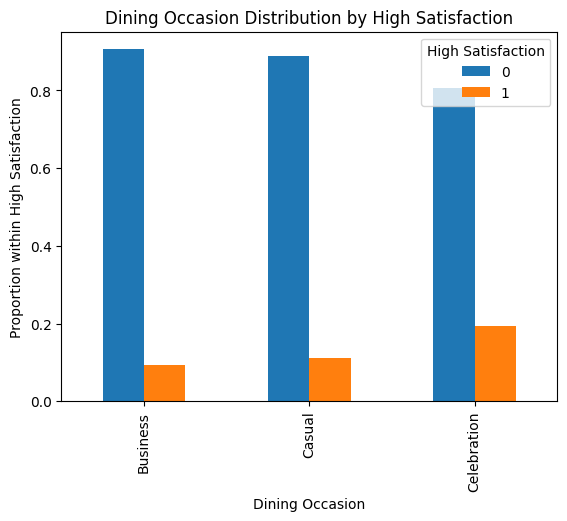

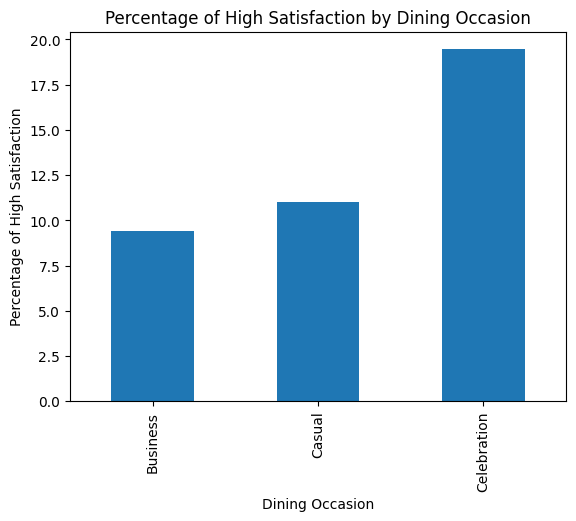

In [ ]:
import matplotlib.pyplot as plt
pd.crosstab(data['DiningOccasion'], data['HighSatisfaction']).apply(lambda r: r/r.sum(), axis=1).plot(kind='bar')
plt.xlabel('Dining Occasion')
plt.ylabel('Proportion within High Satisfaction')
plt.title('Dining Occasion Distribution by High Satisfaction')
plt.legend(title='High Satisfaction')
plt.show()

import matplotlib.pyplot as plt
(pd.crosstab(data['DiningOccasion'], data['HighSatisfaction'])[1] / data['DiningOccasion'].value_counts() * 100).plot(kind='bar')
plt.xlabel('Dining Occasion')
plt.ylabel('Percentage of High Satisfaction')
plt.title('Percentage of High Satisfaction by Dining Occasion')
plt.show()

Clearly, dining occasion affects satisfaction => this feature should be kept

### 13 - Meal Type

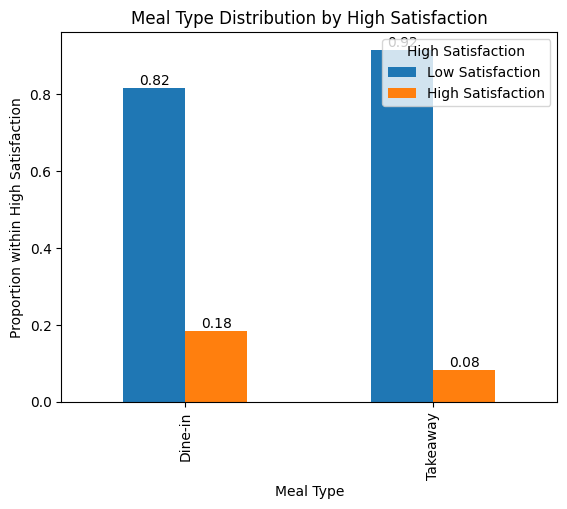

In [ ]:
import matplotlib.pyplot as plt
ax = pd.crosstab(data['MealType'], data['HighSatisfaction']).apply(lambda r: r/r.sum(), axis=1).plot(kind='bar')
plt.xlabel('Meal Type')
plt.ylabel('Proportion within High Satisfaction')
plt.title('Meal Type Distribution by High Satisfaction')
plt.legend(title='High Satisfaction', labels=['Low Satisfaction', 'High Satisfaction'])

for container in ax.containers:
    labels = [f"{round(v, 2)}" for v in container.datavalues]
    ax.bar_label(container, labels=labels)

plt.show()

Dine-in customers are generally more satisfied => this feature affects satisfactiona nd should be kept.

### 14 - Online Reservation

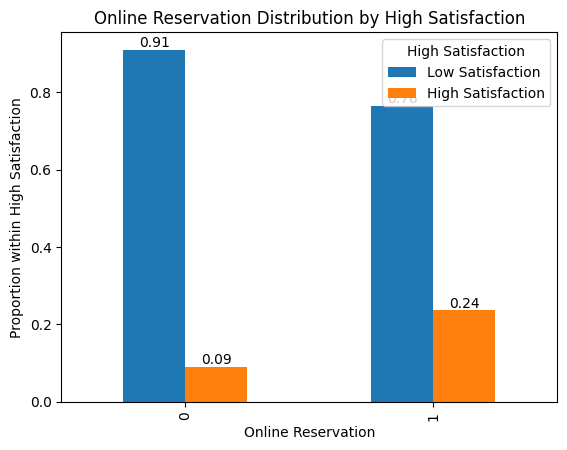

In [ ]:
import matplotlib.pyplot as plt
ax = pd.crosstab(data['OnlineReservation'], data['HighSatisfaction']).apply(lambda r: r/r.sum(), axis=1).plot(kind='bar')
plt.xlabel('Online Reservation')
plt.ylabel('Proportion within High Satisfaction')
plt.title('Online Reservation Distribution by High Satisfaction')
plt.legend(title='High Satisfaction', labels=['Low Satisfaction', 'High Satisfaction'])

for container in ax.containers:
    labels = [f"{round(v, 2)}" for v in container.datavalues]
    ax.bar_label(container, labels=labels)

plt.show()

People with reservations are generally more satisfied => feature should be kept

### 15 - Delivery Order

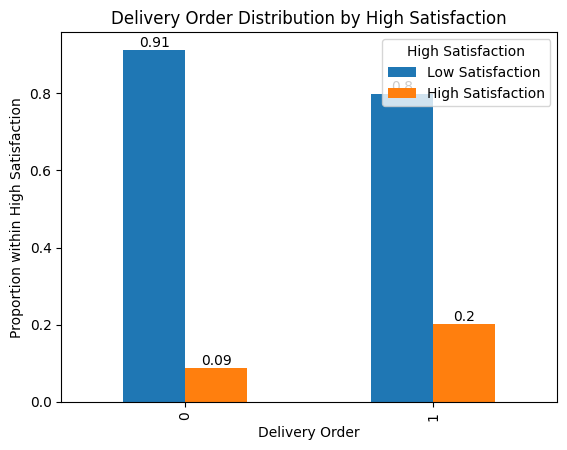

In [ ]:
import matplotlib.pyplot as plt
ax = pd.crosstab(data['DeliveryOrder'], data['HighSatisfaction']).apply(lambda r: r/r.sum(), axis=1).plot(kind='bar')
plt.xlabel('Delivery Order')
plt.ylabel('Proportion within High Satisfaction')
plt.title('Delivery Order Distribution by High Satisfaction')
plt.legend(title='High Satisfaction', labels=['Low Satisfaction', 'High Satisfaction'])

for container in ax.containers:
    labels = [f"{round(v, 2)}" for v in container.datavalues]
    ax.bar_label(container, labels=labels)

plt.show()

### 16 - Loyalty program member

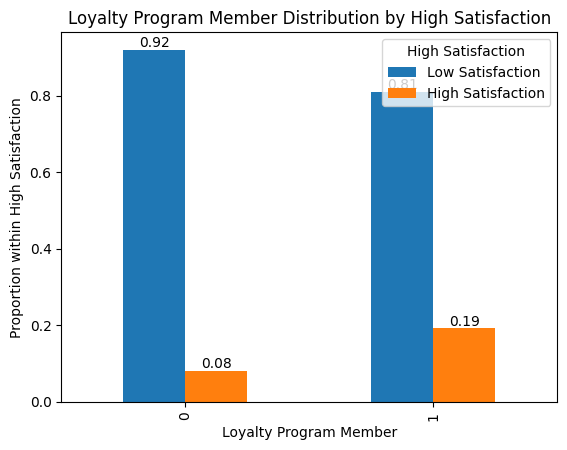

In [ ]:
import matplotlib.pyplot as plt
ax = pd.crosstab(data['LoyaltyProgramMember'], data['HighSatisfaction']).apply(lambda r: r/r.sum(), axis=1).plot(kind='bar')
plt.xlabel('Loyalty Program Member')
plt.ylabel('Proportion within High Satisfaction')
plt.title('Loyalty Program Member Distribution by High Satisfaction')
plt.legend(title='High Satisfaction', labels=['Low Satisfaction', 'High Satisfaction'])

for container in ax.containers:
    labels = [f"{round(v, 2)}" for v in container.datavalues]
    ax.bar_label(container, labels=labels)

plt.show()

### 17 - Wait Time

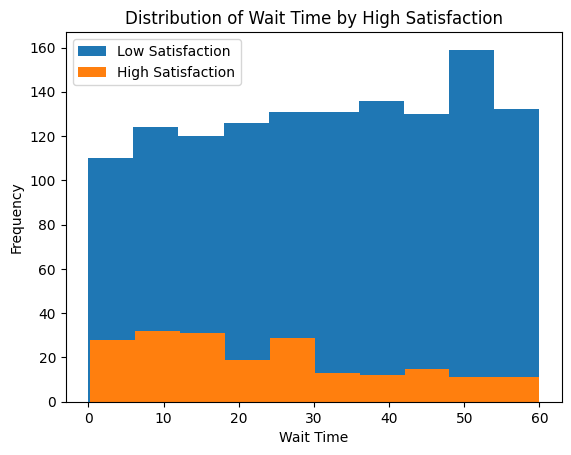

In [ ]:
import matplotlib.pyplot as plt
plt.hist(data[data['HighSatisfaction'] == 0]['WaitTime'], label='Low Satisfaction')
plt.hist(data[data['HighSatisfaction'] == 1]['WaitTime'], alpha=1, label='High Satisfaction')
plt.xlabel('Wait Time')
plt.ylabel('Frequency')
plt.title('Distribution of Wait Time by High Satisfaction')
plt.legend()
plt.show()

In [ ]:
data.groupby('HighSatisfaction')['WaitTime'].describe()

,count,mean,std,min,25%,50%,75%,max
HighSatisfaction,,,,,,,,
0,1299.0,31.137896,17.150849,0.001380,16.446074,31.700681,46.328926,59.959110
1,201.0,23.866655,16.307053,0.267692,10.822847,20.138905,35.898321,59.970762


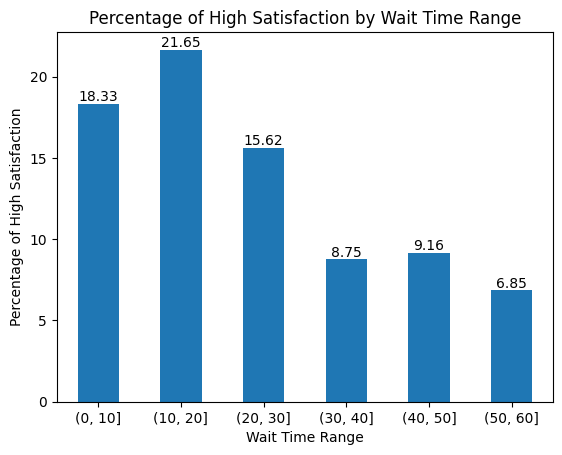

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create bins for wait time
bins = range(0, int(data['WaitTime'].max()) + 10, 10)

# Group data by wait time bins and high satisfaction
grouped_data = data.groupby([pd.cut(data['WaitTime'], bins=bins), 'HighSatisfaction'])['CustomerID'].count().unstack(fill_value=0)

# Calculate percentages for high satisfaction only
percentage_high_satisfaction = (grouped_data[1] / grouped_data.sum(axis=1)) * 100

# Plot the percentages
ax = percentage_high_satisfaction.plot(kind='bar')
plt.xlabel('Wait Time Range')
plt.ylabel('Percentage of High Satisfaction')
plt.title('Percentage of High Satisfaction by Wait Time Range')
plt.xticks(rotation=0)

# Add labels on top of bars
for container in ax.containers:
    labels = [f"{round(v, 2)}" for v in container.datavalues]
    ax.bar_label(container, labels=labels)

plt.show()

## Data Preprocessing
"Garbage in, garbage out".

Data should be preprocessed and cleaned to get rid of noisy data.
Preprocessing includes:
 - removing unused column(s)
 - convert categorical (non numerical) data into numerical
 - normalization: standarize data ranges for all features (e.g., between 0 and 1)


### **Removing columns based on EDA**



In [ ]:
data.drop(['CustomerID', 'Gender', 'TimeOfVisit', 'PreferredCuisine'], inplace=True, axis=1 )


In [ ]:
# get the number of rows and columns
rows = data.shape[0]
columns = data.shape[1]

print('There are {} rows and {} columns.'.format(rows,columns))

There are 1500 rows and 15 columns.


### MealType:

Integer Encoding

*   Takeaway: 0
*   Dine-in: 1

In [ ]:
# define dictionary
_mealtype = {'Takeaway':0, 'Dine-in':1}
# replace sex column with 0/1
data['MealType'] = data["MealType"].apply(lambda x: _mealtype[x])
# print head to verify
data.head()

,Age,Income,VisitFrequency,AverageSpend,GroupSize,DiningOccasion,MealType,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,AmbianceRating,HighSatisfaction
0,35,83380,Weekly,27.829142,3,Business,0,0,1,1,43.523929,2,5,4,0
1,19,43623,Rarely,115.408622,1,Casual,1,0,0,0,57.524294,5,5,3,0
2,41,83737,Weekly,106.693771,6,Celebration,1,0,1,0,48.682623,3,4,5,0
3,43,96768,Rarely,43.508508,1,Celebration,1,0,0,0,7.552993,4,5,1,0
4,55,67937,Monthly,148.084627,1,Business,0,0,0,1,37.789041,2,3,5,0


In [ ]:
# get the number of rows and columns
rows = data.shape[0]
columns = data.shape[1]

print('There are {} rows and {} columns.'.format(rows,columns))

There are 1500 rows and 15 columns.


### DiningOccasion
One hot encoding


*   DiningOccasion_0: Business
*   DiningOccasion_1: Casual
*   DiningOccasion_2: Celebration



### VisitFrequency
One hot encoding


*   VisitFrequency_0: Daily
*   VisitFrequency_1: Monthly
*   VisitFrequency_2: Rarely
*   VisitFrequency_3: Weekly




In [ ]:

visit_frequency_encoded = pd.get_dummies(data['VisitFrequency'], prefix='VisitFrequency', dtype = int)


dining_occasion_encoded = pd.get_dummies(data['DiningOccasion'], prefix='DiningOccasion', dtype = int)

data = pd.concat([data, visit_frequency_encoded, dining_occasion_encoded], axis=1)

data.drop(['VisitFrequency'], inplace=True, axis=1)
data.drop(['DiningOccasion'], inplace=True, axis=1 )


data.head()

,Age,Income,AverageSpend,GroupSize,MealType,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,AmbianceRating,HighSatisfaction,VisitFrequency_Daily,VisitFrequency_Monthly,VisitFrequency_Rarely,VisitFrequency_Weekly,DiningOccasion_Business,DiningOccasion_Casual,DiningOccasion_Celebration
0,35,83380,27.829142,3,0,0,1,1,43.523929,2,5,4,0,0,0,0,1,1,0,0
1,19,43623,115.408622,1,1,0,0,0,57.524294,5,5,3,0,0,0,1,0,0,1,0
2,41,83737,106.693771,6,1,0,1,0,48.682623,3,4,5,0,0,0,0,1,0,0,1
3,43,96768,43.508508,1,1,0,0,0,7.552993,4,5,1,0,0,0,1,0,0,0,1
4,55,67937,148.084627,1,0,0,0,1,37.789041,2,3,5,0,0,1,0,0,1,0,0


In [ ]:
# get the number of rows and columns
rows = data.shape[0]
columns = data.shape[1]

print('There are {} rows and {} columns.'.format(rows,columns))

There are 1500 rows and 20 columns.


### Normalization

In [ ]:
data_before_normalization = data

In [ ]:
# get the max of each column
data_max = data.max()
data_max

Age                               69.000000
Income                        149875.000000
AverageSpend                     199.973527
GroupSize                          9.000000
MealType                           1.000000
OnlineReservation                  1.000000
DeliveryOrder                      1.000000
LoyaltyProgramMember               1.000000
WaitTime                          59.970762
ServiceRating                      5.000000
FoodRating                         5.000000
AmbianceRating                     5.000000
HighSatisfaction                   1.000000
VisitFrequency_Daily               1.000000
VisitFrequency_Monthly             1.000000
VisitFrequency_Rarely              1.000000
VisitFrequency_Weekly              1.000000
DiningOccasion_Business            1.000000
DiningOccasion_Casual              1.000000
DiningOccasion_Celebration         1.000000
dtype: float64

In [ ]:
# divide each column by its maximum value
data = data.divide(data_max)

In [ ]:
data.describe()
data.head(15)

,Age,Income,AverageSpend,GroupSize,MealType,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,AmbianceRating,HighSatisfaction,VisitFrequency_Daily,VisitFrequency_Monthly,VisitFrequency_Rarely,VisitFrequency_Weekly,DiningOccasion_Business,DiningOccasion_Casual,DiningOccasion_Celebration
0,0.507246,0.556330,0.139164,0.333333,0.0,0.0,1.0,1.0,0.725752,0.4,1.0,0.8,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.275362,0.291063,0.577120,0.111111,1.0,0.0,0.0,0.0,0.959206,1.0,1.0,0.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.594203,0.558712,0.533539,0.666667,1.0,0.0,1.0,0.0,0.811773,0.6,0.8,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.623188,0.645658,0.217571,0.111111,1.0,0.0,0.0,0.0,0.125945,0.8,1.0,0.2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.797101,0.453291,0.740521,0.111111,0.0,0.0,0.0,1.0,0.630124,0.4,0.6,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5,0.608696,0.192560,0.555397,0.888889,0.0,0.0,1.0,1.0,0.447773,0.8,1.0,0.6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6,0.289855,0.874756,0.601263,0.666667,1.0,0.0,0.0,0.0,0.132196,1.0,0.8,0.2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
7,0.739130,0.919980,0.805002,0.666667,1.0,1.0,1.0,0.0,0.941245,0.8,0.6,0.6,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
8,0.391304,0.998419,0.282831,0.555556,0.0,0.0,1.0,0.0,0.659791,0.4,0.8,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9,0.463768,0.908390,0.328811,1.000000,0.0,0.0,0.0,0.0,0.346543,0.8,0.6,0.2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
# get the number of rows and columns
rows = data.shape[0]
columns = data.shape[1]

print('There are {} rows and {} columns.'.format(rows,columns))

There are 1500 rows and 20 columns.


## Model Training & Testing

In [ ]:
#move highsat to last col
# Get a list of columns
cols = list(data.columns)

# Move the 'HighSatisfaction' column to the end
cols.append(cols.pop(cols.index('HighSatisfaction')))

# Reorder the DataFrame columns
data = data[cols]

In [ ]:
data.head()

,Age,Income,AverageSpend,GroupSize,MealType,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,AmbianceRating,VisitFrequency_Daily,VisitFrequency_Monthly,VisitFrequency_Rarely,VisitFrequency_Weekly,DiningOccasion_Business,DiningOccasion_Casual,DiningOccasion_Celebration,HighSatisfaction
0,0.507246,0.556330,0.139164,0.333333,0.0,0.0,1.0,1.0,0.725752,0.4,1.0,0.8,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.275362,0.291063,0.577120,0.111111,1.0,0.0,0.0,0.0,0.959206,1.0,1.0,0.6,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.594203,0.558712,0.533539,0.666667,1.0,0.0,1.0,0.0,0.811773,0.6,0.8,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.623188,0.645658,0.217571,0.111111,1.0,0.0,0.0,0.0,0.125945,0.8,1.0,0.2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.797101,0.453291,0.740521,0.111111,0.0,0.0,0.0,1.0,0.630124,0.4,0.6,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
# get the number of rows and columns
rows = data.shape[0]
columns = data.shape[1]

print('There are {} rows and {} columns.'.format(rows,columns))

There are 1500 rows and 20 columns.


### Data Split

In [ ]:
# store all columns excpet last one as inputs in X
X = data.iloc[:,0:-1].values
# store the last column as the output (label) in y
y = data.iloc[:,-1].values

# split dataset in a 80/20 split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1200, 19) (1200,)
(300, 19) (300,)


### Models: LogisticRegression, RandomForest, DecisionTree
& get model scores

In [ ]:
# import the LogisticRegression class
from sklearn.linear_model import LogisticRegression

# define our regression model
logistic_model = LogisticRegression()

# train our model
logistic_model.fit(x_train, y_train)
print('Model trained!')

Model trained!


Evaluation

In [ ]:
print('Model score {}'.format(logistic_model.score(x_test, y_test)))

Model score 0.92


Random Forest

In [ ]:
# import the RandomForestClassifier class
from sklearn.ensemble import RandomForestClassifier

# define our random forest model
forest_model = RandomForestClassifier()

# train our model
forest_model.fit(x_train, y_train)
print('Model trained!')

Model trained!


In [ ]:
print('Model score {}'.format(forest_model.score(x_test, y_test)))

Model score 0.8733333333333333


Decision Tree

In [ ]:
# import the DecisionTreeClassifier class
from sklearn.tree import DecisionTreeClassifier

# define our decision tree model
tree_model = DecisionTreeClassifier()

# train our model
tree_model.fit(x_train, y_train)
print('Model trained!')

Model trained!


In [ ]:
print('Model score {}'.format(tree_model.score(x_test, y_test)))

Model score 0.7733333333333333


## Feature Importance

In [ ]:
data.head()

,Age,Income,AverageSpend,GroupSize,MealType,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,AmbianceRating,VisitFrequency_Daily,VisitFrequency_Monthly,VisitFrequency_Rarely,VisitFrequency_Weekly,DiningOccasion_Business,DiningOccasion_Casual,DiningOccasion_Celebration,HighSatisfaction
0,0.507246,0.556330,0.139164,0.333333,0.0,0.0,1.0,1.0,0.725752,0.4,1.0,0.8,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.275362,0.291063,0.577120,0.111111,1.0,0.0,0.0,0.0,0.959206,1.0,1.0,0.6,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.594203,0.558712,0.533539,0.666667,1.0,0.0,1.0,0.0,0.811773,0.6,0.8,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.623188,0.645658,0.217571,0.111111,1.0,0.0,0.0,0.0,0.125945,0.8,1.0,0.2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.797101,0.453291,0.740521,0.111111,0.0,0.0,0.0,1.0,0.630124,0.4,0.6,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


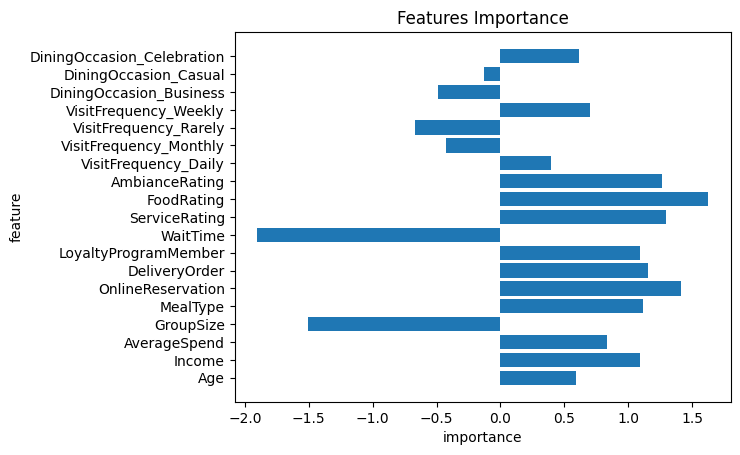

In [ ]:
columns_names = data.columns[0:-1].values
# features_importance is a 2D array with shape (1, 19), so we flatten it to a 1D array
features_importance = logistic_model.coef_.flatten()
plt.barh(columns_names, features_importance)
plt.title('Features Importance')
plt.xlabel('importance')
plt.ylabel('feature')
plt.show()

A negative feature importance means that satisfaction decreases. ie higher wait times, larger groups => lower satisfaction

## Sample Data Prediction

In [ ]:
import pandas as pd

def preprocess_sample_data(sample_data):
    df = pd.DataFrame([sample_data])

    visit_frequency_encoded = pd.get_dummies(df['VisitFrequency'], prefix='VisitFrequency', dtype=int)
    dining_occasion_encoded = pd.get_dummies(df['DiningOccasion'], prefix='DiningOccasion', dtype=int)

# Get all possible categories for each feature
    all_visit_frequencies = ['Daily', 'Weekly', 'Monthly', 'Rarely']
    all_dining_occasions = ['Casual', 'Business', 'Celebration']

# Add missing dummy columns and fill with 0
    for frequency in all_visit_frequencies:
        if 'VisitFrequency_' + frequency not in visit_frequency_encoded.columns:
          visit_frequency_encoded['VisitFrequency_' + frequency] = 0
    for occasion in all_dining_occasions:
        if 'DiningOccasion_' + occasion not in dining_occasion_encoded.columns:
          dining_occasion_encoded['DiningOccasion_' + occasion] = 0

    df = pd.concat([df, visit_frequency_encoded, dining_occasion_encoded], axis=1)
    df = df.drop(['VisitFrequency', 'DiningOccasion'], axis=1)

    _mealtype = {'Takeaway':0, 'Dine-in':1}

    df['MealType'] = df["MealType"].apply(lambda x: _mealtype[x])

#normalization
    numerical_cols = df.select_dtypes(include=['number']).columns
    original_data_max = data_before_normalization[numerical_cols].max() # Get max values from original data
    df[numerical_cols] = df[numerical_cols].divide(original_data_max) # Normalize

    return df # Explicitly return the modified DataFrame

In [ ]:
import pandas as pd

# Your sample data
sample_data = {
    'Age': 20,
    'Income': 70000,
    'VisitFrequency': 'Daily',
    'AverageSpend': 3,
    'GroupSize': 4,
    'DiningOccasion': 'Celebration',
    'MealType': 'Dine-in',
    'OnlineReservation': 1,
    'DeliveryOrder': 1,
    'LoyaltyProgramMember': 1,
    'WaitTime': 15,
    'ServiceRating': 5,
    'FoodRating': 3,
    'AmbianceRating': 2
}


processed_sample_data = preprocess_sample_data(sample_data)

prediction = logistic_model.predict(processed_sample_data)

if(prediction[0] == 1):
  print("Customer was HIGHLY satisfied")
else:
  print("Customer wasn't HIGHLY satisfied")



Customer was HIGHLY satisfied


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
sample_data_df = pd.DataFrame([sample_data])
print(sample_data_df.shape)
sample_data_df.head()

(1, 14)


,Age,Income,VisitFrequency,AverageSpend,GroupSize,DiningOccasion,MealType,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,AmbianceRating
0,20,70000,Daily,3,4,Celebration,Dine-in,1,1,1,15,5,3,2


In [ ]:
print(processed_sample_data.shape)
processed_sample_data.head()

(1, 19)


,Age,Income,AverageSpend,GroupSize,MealType,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,AmbianceRating,VisitFrequency_Daily,VisitFrequency_Weekly,VisitFrequency_Monthly,VisitFrequency_Rarely,DiningOccasion_Celebration,DiningOccasion_Casual,DiningOccasion_Business
0,0.289855,0.467056,0.015002,0.444444,1.0,1.0,1.0,1.0,0.250122,1.0,0.6,0.4,1.0,0.0,0.0,0.0,1.0,0.0,0.0
